<a href="https://colab.research.google.com/github/sucheerarighthere/bsc_dpdm22/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## นำเข้าข้อมูล

In [1]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


from sklearn.tree import plot_tree 
from sklearn.metrics import classification_report

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/Project/train.csv')

In [4]:
test = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/Project/test.csv')

In [5]:
train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
test.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


#Data preparation

In [7]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
train[['m_dep','px_height','sc_w']].describe()

,m_dep,px_height,sc_w
count,2000.000000,2000.000000,2000.000000
mean,0.501750,645.108000,5.767000
std,0.288416,443.780811,4.356398
min,0.100000,0.000000,0.000000
25%,0.200000,282.750000,2.000000
50%,0.500000,564.000000,5.000000
75%,0.800000,947.250000,9.000000
max,1.000000,1960.000000,18.000000


ไฟล์ train มี features m_dep, px height และ sc_w ที่มีค่า min ไม่สมเหตุสมผล 

min -> m_dep = 0.10,px height = 0 และ sc_w = 0

In [9]:
test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


ไฟล์ test มี features m_dep, px height และ sc_w ที่มีค่า min ไม่สมเหตุสมผล 

min -> m_dep = 0.10,px height = 0 และ sc_w = 0

In [10]:
test[['m_dep','px_height','sc_w']].describe()

,m_dep,px_height,sc_w
count,1000.000000,1000.000000,1000.000000
mean,0.517500,627.121000,5.316000
std,0.280861,432.929699,4.240062
min,0.100000,0.000000,0.000000
25%,0.300000,263.750000,2.000000
50%,0.500000,564.500000,5.000000
75%,0.800000,903.000000,8.000000
max,1.000000,1907.000000,18.000000


## Data Cleaning


*   ปรับค่า min ใหม่
*   Check Missing Values



### ปรับค่า min ใหม่

กำหนดขั้นต่ำของความลึก (m_dep) คือ 0.5 เซนติเมตร

In [11]:
#train
below_threshold = train['m_dep'][train['m_dep'] < 0.5] #หา m_dep ที่น้อยกว่า 0.5
len(below_threshold)

900

In [12]:
#Replace values below 0.5 cm with 0.5 cm
train['m_dep'][train['m_dep'] < 0.5] = 0.5

<ipython-input-12-250f37e6db8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['m_dep'][train['m_dep'] < 0.5] = 0.5


In [13]:
#test
below_threshold1 = test['m_dep'][test['m_dep'] < 0.5] 
len(below_threshold1)

418

In [14]:
# Replace values below 0.5 cm with 0.5 cm
test['m_dep'][test['m_dep'] < 0.5] = 0.5

<ipython-input-14-2c0261fb8b7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['m_dep'][test['m_dep'] < 0.5] = 0.5


กำหนดขั้นต่ำความละเอียดพิกเซล (px_height) คือ 65 พิกเซล



In [15]:
#train
below_threshold2 = train['px_height'][train['px_height'] < 65] #หา px_height ที่น้อยกว่า 0.5
len(below_threshold2)

90

In [16]:
# Replace values below 65 pixels with 65 pixels
train['px_height'][train['px_height'] < 65] = 65

<ipython-input-16-383d824008ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['px_height'][train['px_height'] < 65] = 65


In [17]:
#test
below_threshold3 = test['px_height'][test['px_height'] < 65]
len(below_threshold3)

62

In [18]:
# Replace values below 65 pixels with 65 pixels
test['px_height'][test['px_height'] < 65] = 65

<ipython-input-18-af7f92bb92fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['px_height'][test['px_height'] < 65] = 65


กำหนดขั้นต่ำของความกว้างหน้าจอ (sc_w) คือ 1 นิ้ว = 2.54 เซนติเมตร

In [19]:
#train
below_threshold4 = train['sc_w'][train['sc_w'] < 2.54]
len(below_threshold4)

546

In [20]:
# Replace values below 2.54 cm with 2.54 cm
train['sc_w'][train['sc_w'] < 2.54] = 2.54

<ipython-input-20-1be334c8beb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['sc_w'][train['sc_w'] < 2.54] = 2.54


In [21]:
#test
below_threshold5 = test['sc_w'][test['sc_w'] < 2.54]
len(below_threshold5)

318

In [22]:
# Replace values below 2.54 cm with 2.54 cm
test['sc_w'][test['sc_w'] < 2.54] = 2.54

<ipython-input-22-65e6fc4dc1d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sc_w'][test['sc_w'] < 2.54] = 2.54


In [23]:
train[['m_dep','px_height','sc_w']].describe()

,m_dep,px_height,sc_w
count,2000.000000,2000.000000,2000.000000
mean,0.626000,646.529000,6.199420
std,0.165159,441.845917,3.891793
min,0.500000,65.000000,2.540000
25%,0.500000,282.750000,2.540000
50%,0.500000,564.000000,5.000000
75%,0.800000,947.250000,9.000000
max,1.000000,1960.000000,18.000000


In [24]:
test[['m_dep','px_height','sc_w']].describe()

,m_dep,px_height,sc_w
count,1000.00000,1000.000000,1000.000000
mean,0.62880,629.296000,5.810720
std,0.16516,429.975194,3.740874
min,0.50000,65.000000,2.540000
25%,0.50000,263.750000,2.540000
50%,0.50000,564.500000,5.000000
75%,0.80000,903.000000,8.000000
max,1.00000,1907.000000,18.000000


### check missing

In [25]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [26]:
test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

ไม่พบ missing

## Correlation Analysis

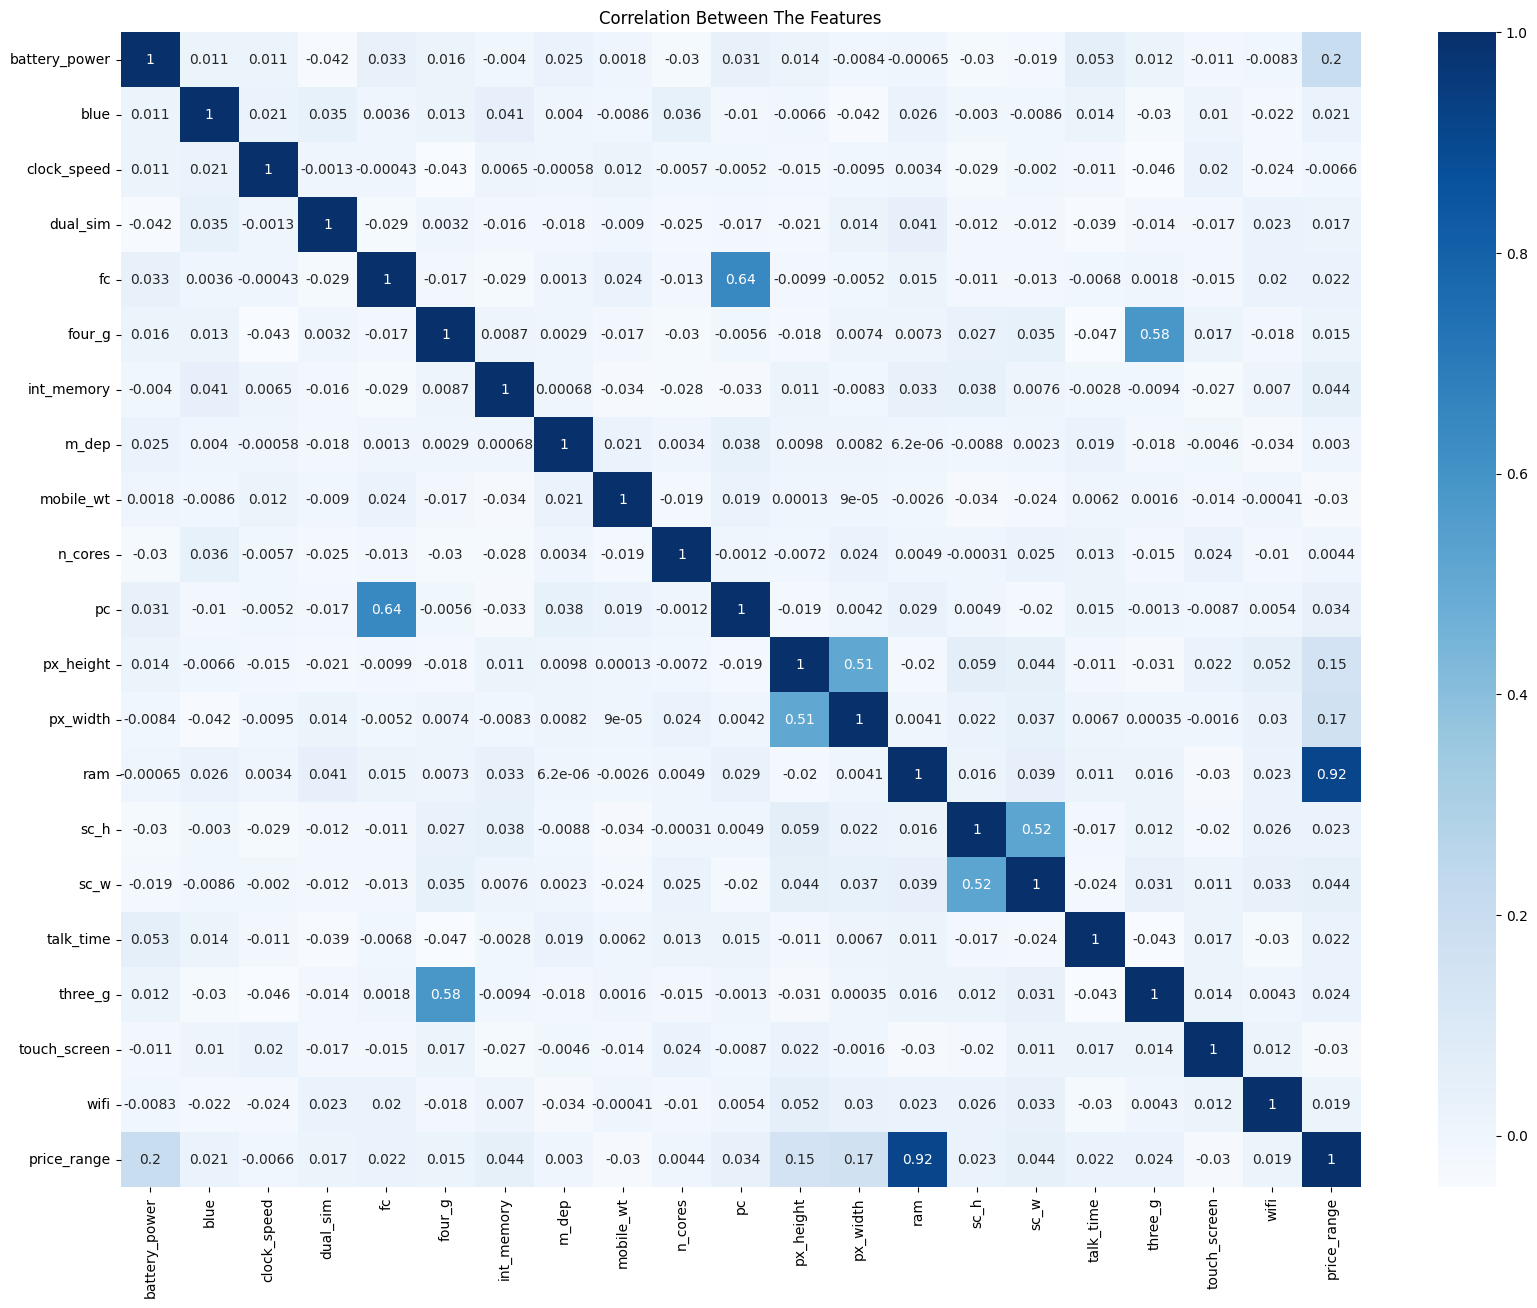

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(), annot=True, cmap='Blues')
plt.title('Correlation Between The Features')
plt.show()

จาก heatmap จะพบว่า
*   หน่วยความจำ และ ช่วงราคา มีความสัมพันธ์กันอย่างมาก 
*   หน่วยความจำ, แบตเตอรี่, ความกว้างความละเอียดของภาพ และ ความสูงของความละเอียดของภาพ มีความสัมพันธ์กับช่วงราคา
*   4G และ 3G, กล้องหน้า และ กล้องหลัก, ความกว้างความละเอียดของภาพ และ ความสูงของความละเอียดของภาพ และ ความสูงหน้าจอมือถือ และ ความกว้างหน้าจอมือถือ มีความสัมพันธ์ในระดับปานกลาง



# **classification**
การคาดการณ์ช่วงราคาของโทรศัพท์มือถือโดยการสร้างแบบจำลองที่คำนึงถึงคุณลักษณะต่างๆ 
ที่มีอยู่ในชุดข้อมูล เราจะใช้วิธี Decision Tree, K-Nearest Neighbors
และ Naive Bayes 

In [28]:
x = train.drop('price_range', axis=1) # drop column 'price_range' ให้เหลือแค่ Feature
y = train['price_range'].values.reshape(-1, 1) #Target : price_range

In [29]:
# แบ่งข้อมูลออกเป็น train 80% test 20% 
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2) # random_state ทำให้การสุ่มแต่ละครั้งมีผลการสุ่มเหมือนเดิม

## DecisionTree

In [30]:
#  gridsearch หาพารามิเตอร์ที่ดีที่สุด
clf_dt = DecisionTreeClassifier()

max_depth = range(3, 21)
criterion = ['entropy', 'gini']
random_state = range(1, 8)

parameters = {'max_depth': max_depth, 'criterion': criterion, 'random_state': random_state}

gridsearch = GridSearchCV(estimator=clf_dt,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          verbose=1,
                          n_jobs=-1)

gridsearch.fit(X_train, y_train)

print('Best parameters:', gridsearch.best_params_)

Fitting 10 folds for each of 252 candidates, totalling 2520 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'random_state': 2}


In [31]:
# Define the decision tree model
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=2,)
# Fit the model to the training set
clf.fit(X_train, y_train)
#predict
y_pred = clf.predict(X_test)
# Calculate the accuracy of the model
acc_dt = accuracy_score(y_test, y_pred)
print(f'Decision Tree accuracy score: {acc_dt:.4f}');

Decision Tree accuracy score: 0.8750


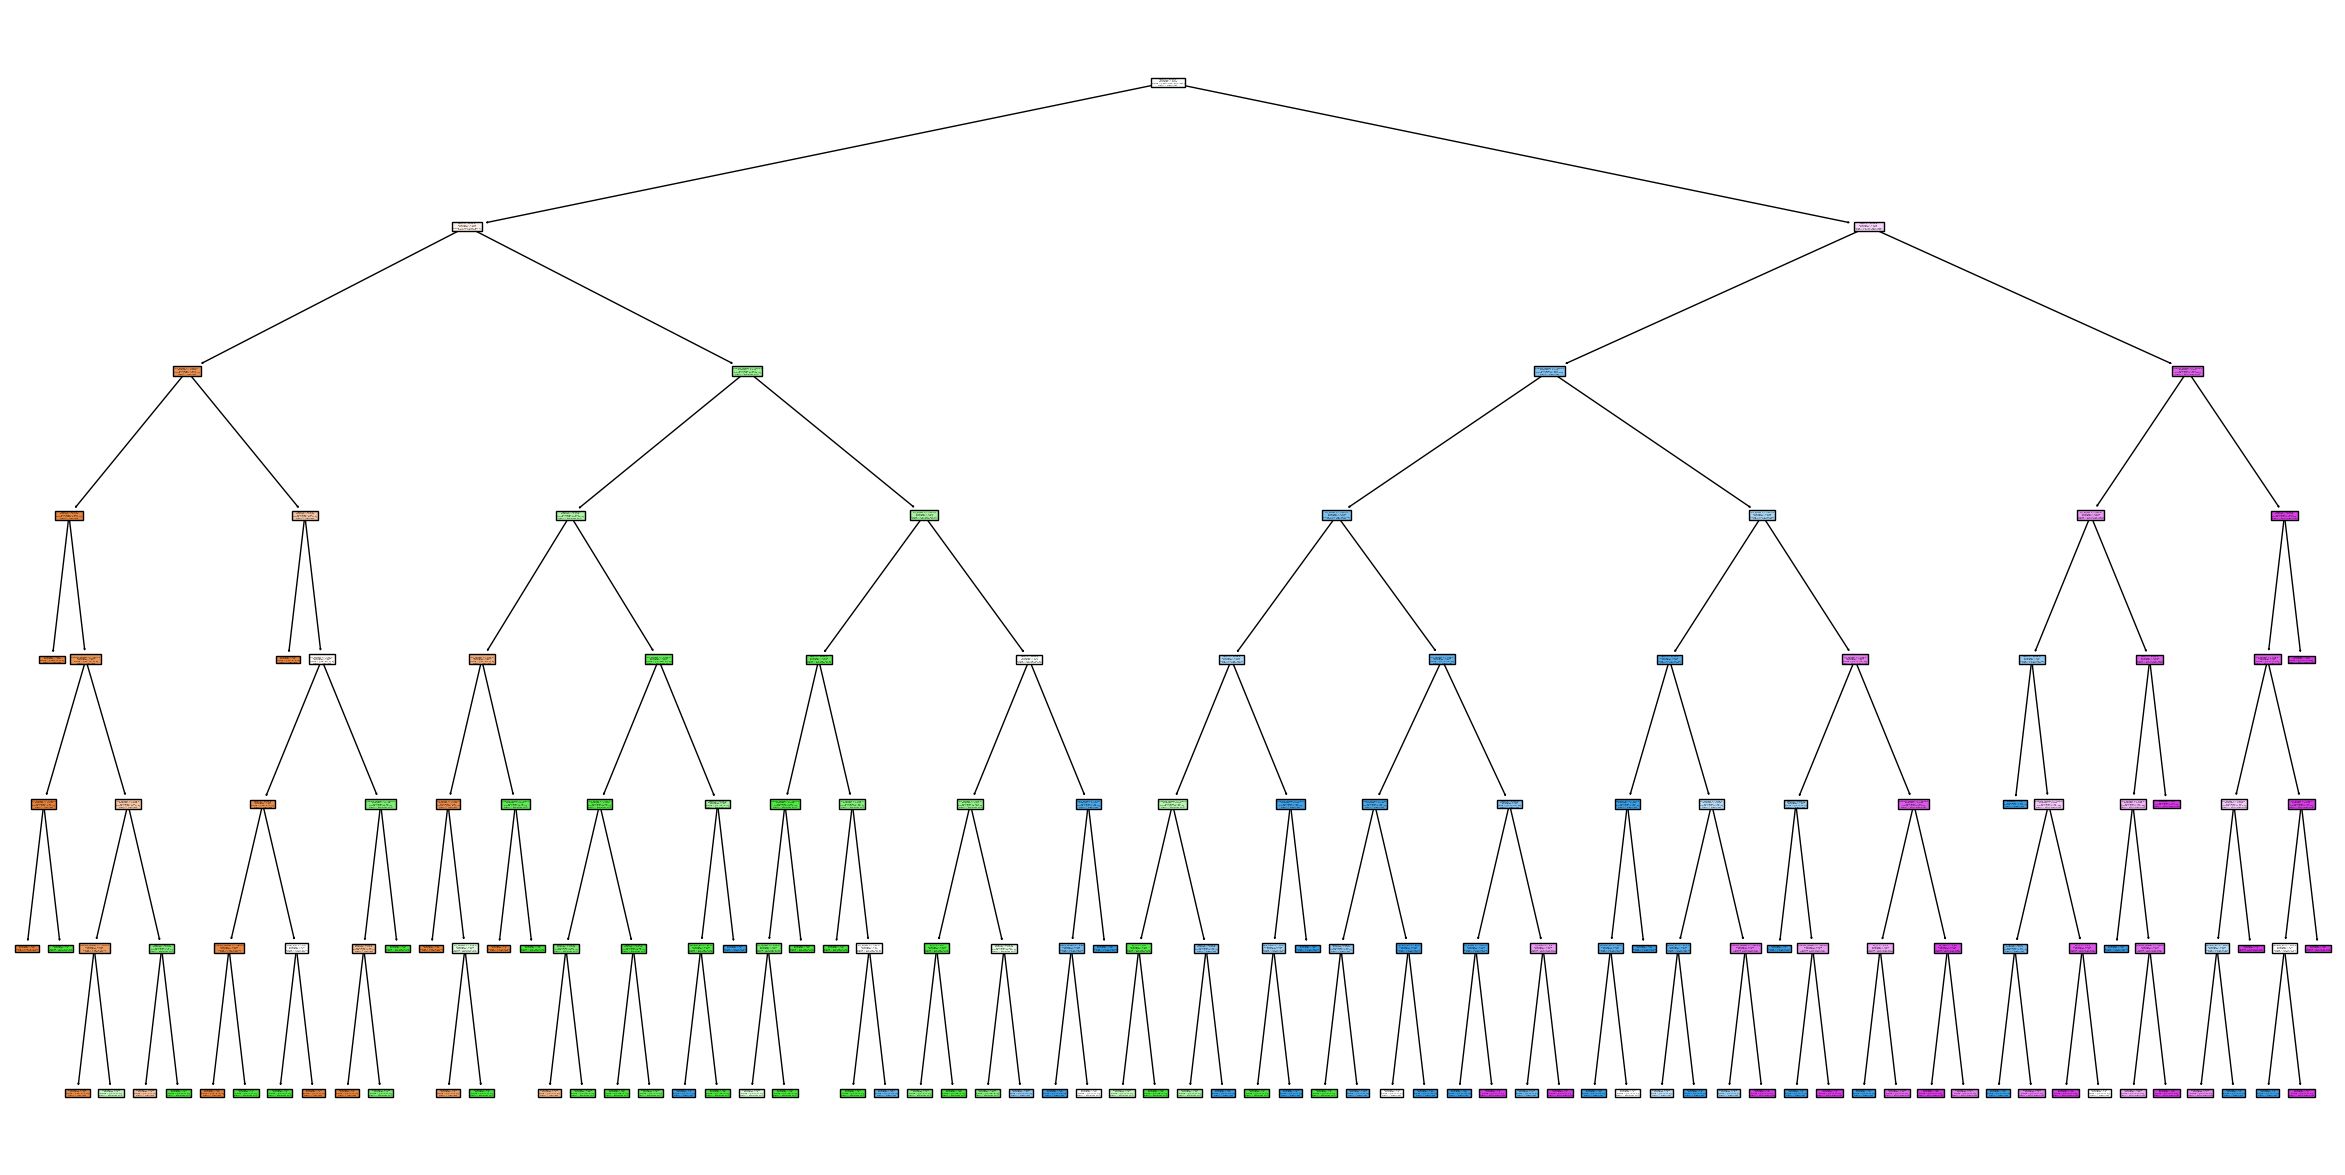

In [32]:
feature_names = x.columns
target_names = ['low cost', 'medium cost', 'high cost', 'very high cost']

fig = plt.figure(figsize = (30, 15))
Plot = plot_tree(clf, feature_names = feature_names, class_names = target_names, filled = True)

### Evaluation

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        98
           1       0.90      0.82      0.86       109
           2       0.84      0.81      0.82        94
           3       0.88      0.93      0.90        99

    accuracy                           0.88       400
   macro avg       0.87      0.88      0.87       400
weighted avg       0.88      0.88      0.87       400



###Confusion Matrix

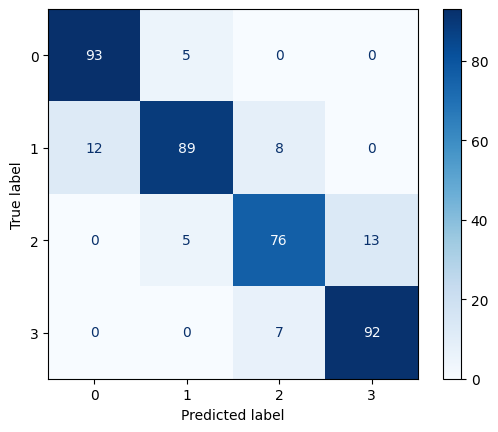

In [34]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## K-Nearest Neighbors

หา parameters ที่ดีที่สุด (K (1,3,5))

In [35]:
# Define the hyperparameters to tune
param_grid = {'n_neighbors': [1, 3, 5]}

# Define the classifier
knn = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print('Best parameters:', grid_search.best_params_)

Best parameters: {'n_neighbors': 5}


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [36]:
# Instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training set
knn.fit(X_train,y_train)

#predict
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
acc_knn = accuracy_score(y_test, y_pred)
print(f'KNN accuracy score: {acc_knn:.4f}');

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN accuracy score: 0.9325


### Evaluation

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        98
           1       0.96      0.90      0.93       109
           2       0.94      0.88      0.91        94
           3       0.92      0.96      0.94        99

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



###Confusion Matrix

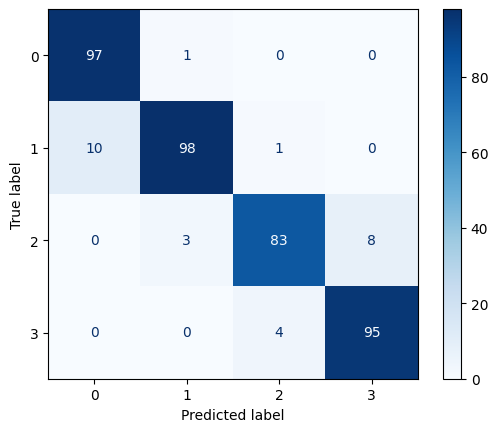

In [38]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Naive Bayes

In [39]:
# Naive Bayes 
# Instantiate the model
nb = GaussianNB()

# Fit the model to the training set
nb.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = nb.predict(X_test)

# Evaluate the performance of the model
acc_nb = accuracy_score(y_test, y_pred)
print(f'Naive Bayes accuracy score: {acc_nb:.4f}');

Naive Bayes accuracy score: 0.8375


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Evaluation

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        98
           1       0.79      0.73      0.76       109
           2       0.80      0.70      0.75        94
           3       0.90      0.96      0.93        99

    accuracy                           0.84       400
   macro avg       0.83      0.84      0.83       400
weighted avg       0.83      0.84      0.83       400



###Confusion Matrix

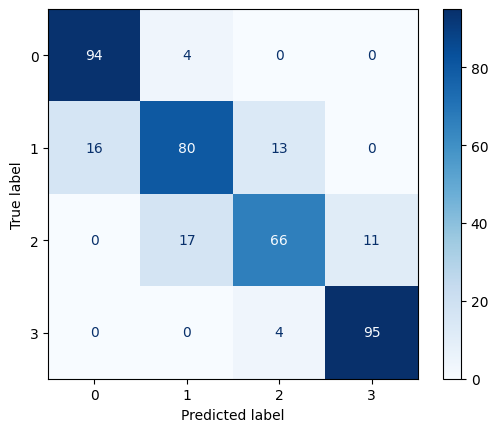

In [41]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

เปรียบเทียบค่า accuracy score ของแต่ละ model

In [42]:
print(f'Decision Tree accuracy score: {acc_dt:.4f}');
print(f'KNN accuracy score: {acc_knn:.4f}');
print(f'Naive Bayes accuracy score: {acc_nb:.4f}');

Decision Tree accuracy score: 0.8750
KNN accuracy score: 0.9325
Naive Bayes accuracy score: 0.8375


##Model Evaluation

จากการเปรียบเทียบค่า accuracy score Model KNN สามารถคาดการณ์ได้แม่นยำที่สุด เพราะมีค่า accuracy score สูงที่สุด

## Predicting Values for test.csv
จากที่ KNN ได้ accuracy score สูงที่สุด จึงนำ model KNN มาคาดการณ์ช่วงราคาสำหรับโทรศัพท์มือถือเครื่องใหม่ในไฟล์ test

In [43]:
test_dt = test.drop('id',axis=1)
test_dt.shape

(1000, 20)

In [44]:
test_pred = knn.predict(test_dt)

In [45]:
test_dt['predicted_price'] = test_pred

In [46]:
test_dt['predicted_price'].replace({0: 'low cost',1: 'medium cost', 2: 'high cost', 3:'very high cost'}, inplace=True)

In [47]:
test_dt

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price
0,1043,1,1.8,1,14,0,5,0.5,193,3,...,226,1412,3476,12,7.00,2,0,1,0,very high cost
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,2.54,7,1,0,0,very high cost
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10.00,10,0,1,1,very high cost
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,2.54,7,1,1,0,very high cost
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8.00,7,1,0,1,medium cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8.00,15,1,1,0,high cost
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,2.54,19,0,1,1,medium cost
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,2.54,14,1,0,0,low cost
998,1533,1,0.5,1,0,0,50,0.5,171,2,...,65,832,2509,15,11.00,6,0,1,0,high cost


# **K - means cluttering**
Clustering การจัดกลุ่มจะแตกต่างจากการแบ่งประเภทข้อมูล
(Classification) โดยจะแบ่งกลุ่มข้อมูลจากความคล้าย โดยไม่มีการกำหนดคลาสประเภทข้อมูลไว้ก่อนหรือไม่ทราบจำนวน
กลุ่มล่วงหน้า เป็นการเรียนรู้แบบไม่มีผู้สอน (unsupervised
classification) 

ต้องเป็นตัวแปรเชิงปริมาณ (Quantitative)
  - สเกลอันตรภาค (Interval Scale)
  - สเกลอัตราส่วน (Ratio Scale

In [48]:
dt_test = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/Project/test.csv')

In [49]:
dt_train = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/Project/train.csv')

In [50]:
# drop price ออก
#kmeandata=df.drop('price_range',axis=1) ไม่ใช้
#kmeandata =train ไม่ใช้ 

kmeandata=pd.concat([dt_test,dt_train]) #เพื่อแบ่งเท่าๆกัน ใช้train set , test set 3000 rows
kmeandata =kmeandata.drop('price_range',axis=1) #drop price_range ที่ train,test มีไม่เหมือนกัน 

In [51]:
kmeandata #data ที่ใช้ในการทำ k Mean clusttering

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1.0,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2.0,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3.0,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4.0,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5.0,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NaN,794,1,0.5,1,0,1,2,0.8,106,...,14,1222,1890,668,13,4,19,1,1,0
1996,NaN,1965,1,2.6,1,0,0,39,0.2,187,...,3,915,1965,2032,11,10,16,1,1,1
1997,NaN,1911,0,0.9,1,1,1,36,0.7,108,...,3,868,1632,3057,9,1,5,1,1,0
1998,NaN,1512,0,0.9,0,4,1,46,0.1,145,...,5,336,670,869,18,10,19,1,1,1


In [52]:
kmeandata.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

select columns to group >> 'battery_power', 'px_height'

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


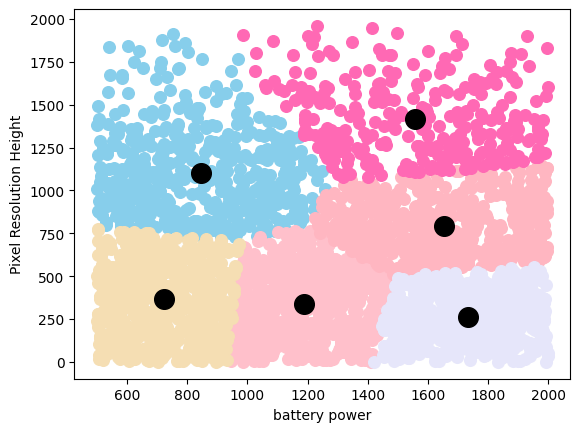

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data into a DataFrame
df = kmeandata

# Extract features to cluster on
X = df[['battery_power', 'px_height']].values 
#เพื่อจัดกลุ่ม ว่าจะตั้งราคาโดยจัดกลุ่มตาม ความจุแบตและ พิกเซล ของควาทมสูงจอ?

# Choose number of clusters
k = 6

# Run K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get cluster assignments and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize clusters
colors = ['skyblue', 'pink', 'lightpink', 'wheat', 'lavender', 'hotpink'] # Add more colors if needed
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=70, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:,1], s=200, marker='o', c='black', label='Centroids')
plt.xlabel('battery power') #Total energy a battery can store in one time measured in mAh
plt.ylabel('Pixel Resolution Height') 
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


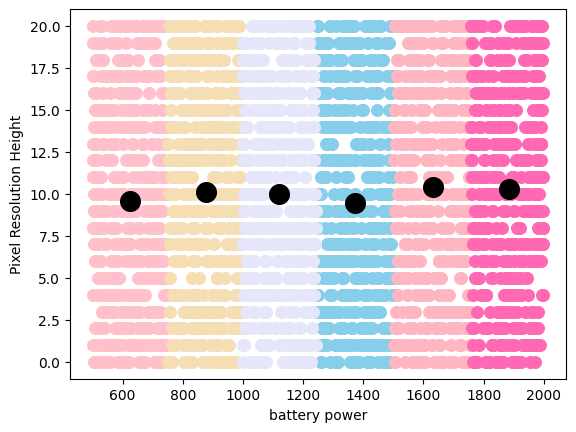

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data into a DataFrame
df = kmeandata

# Extract features to cluster on
X = df[['battery_power', 'pc']].values

# Choose number of clusters
k = 6

# Run K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get cluster assignments and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize clusters
colors = ['skyblue', 'pink', 'lightpink', 'wheat', 'lavender', 'hotpink'] # Add more colors if needed
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=70, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:,1], s=200, marker='o', c='black', label='Centroids')
plt.xlabel('battery power') #Total energy a battery can store in one time measured in mAh
plt.ylabel('Pixel Resolution Height') 
plt.show()

การจัดกลุ่มโทรศัพท์มือถือที่คล้ายกันเข้าด้วยกันตามคุณสมบัติ

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 2 2 ... 0 0 1]


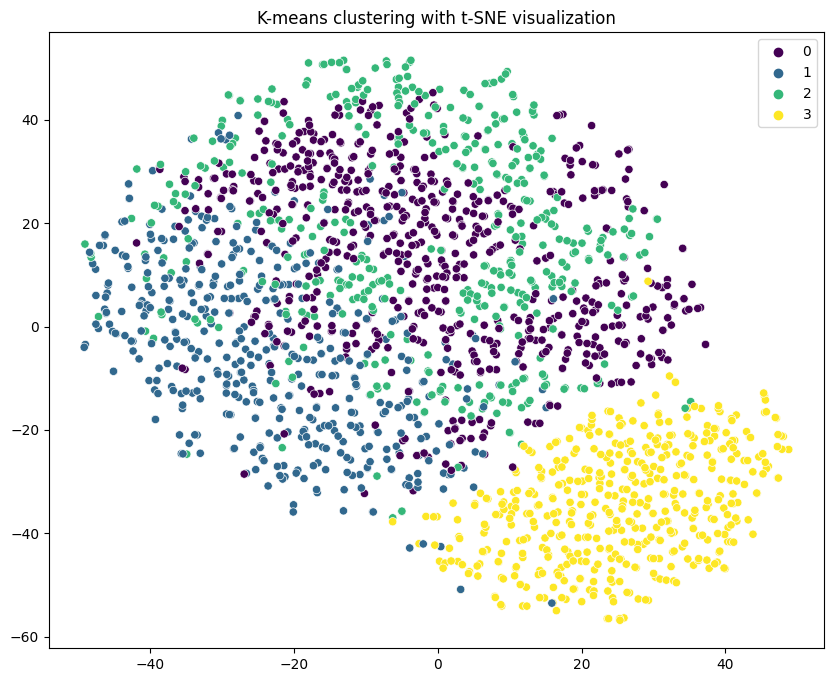

In [55]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_data = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/Project/train.csv')
# Preprocess the data
X = train_data.drop(['price_range'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Print the cluster labels
print(kmeans.labels_)

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create scatter plot of t-SNE visualization with cluster labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=kmeans.labels_, palette='viridis')
plt.title('K-means clustering with t-SNE visualization')
plt.show()

# **Association rule**
Association rule มักจะใช้หารูปแบบในผลิตภัณฑ์ที่ลูกค้ามักจะซื้อร่วมกัน อาจใช้ไม่ได้โดยตรงกับปัญหาการจัดประเภทราคามือถือ เราเลยนำ Association rule มาสำรวจความสัมพันธ์ระหว่างคุณลักษณะต่างๆ แทน 

In [56]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load the data
train_data = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/Project/train.csv')

# Preprocess the data
X = train_data.drop('price_range', axis=1)
X = pd.get_dummies(X, columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'], drop_first=True)

# Convert the data to a binary matrix
X = (X > 0).astype(int)

# Use Apriori to find frequent itemsets
frequent_itemsets = apriori(X, min_support=0.1, use_colnames=True)

# Use Association Rules to find interesting associations
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the top 10 rules sorted by lift
print(rules.sort_values('lift', ascending=False).head(10))

                             antecedents                          consequents  \
104      (blue_1, dual_sim_1, three_g_1)                           (four_g_1)   
117                           (four_g_1)      (blue_1, dual_sim_1, three_g_1)   
112               (dual_sim_1, four_g_1)                  (blue_1, three_g_1)   
109                  (blue_1, three_g_1)               (dual_sim_1, four_g_1)   
173                   (four_g_1, wifi_1)              (dual_sim_1, three_g_1)   
170              (dual_sim_1, three_g_1)                   (four_g_1, wifi_1)   
141                           (four_g_1)  (touch_screen_1, blue_1, three_g_1)   
128  (touch_screen_1, blue_1, three_g_1)                           (four_g_1)   
145                  (blue_1, three_g_1)                   (four_g_1, wifi_1)   
150                   (four_g_1, wifi_1)                  (blue_1, three_g_1)   

     antecedent support  consequent support  support  confidence      lift  \
104              0.1890       

In [57]:
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
104,"(blue_1, dual_sim_1, three_g_1)",(four_g_1),0.1890,0.5215,0.1365,0.722222,1.384894,0.037937,1.722600
117,(four_g_1),"(blue_1, dual_sim_1, three_g_1)",0.5215,0.1890,0.1365,0.261745,1.384894,0.037937,1.098536
112,"(dual_sim_1, four_g_1)","(blue_1, three_g_1)",0.2665,0.3705,0.1365,0.512195,1.382443,0.037762,1.290475
109,"(blue_1, three_g_1)","(dual_sim_1, four_g_1)",0.3705,0.2665,0.1365,0.368421,1.382443,0.037762,1.161375
173,"(four_g_1, wifi_1)","(dual_sim_1, three_g_1)",0.2600,0.3850,0.1370,0.526923,1.368631,0.036900,1.300000
170,"(dual_sim_1, three_g_1)","(four_g_1, wifi_1)",0.3850,0.2600,0.1370,0.355844,1.368631,0.036900,1.148790
141,(four_g_1),"(touch_screen_1, blue_1, three_g_1)",0.5215,0.1885,0.1345,0.257910,1.368222,0.036197,1.093533
128,"(touch_screen_1, blue_1, three_g_1)",(four_g_1),0.1885,0.5215,0.1345,0.713528,1.368222,0.036197,1.670319
145,"(blue_1, three_g_1)","(four_g_1, wifi_1)",0.3705,0.2600,0.1315,0.354926,1.365099,0.035170,1.147155
150,"(four_g_1, wifi_1)","(blue_1, three_g_1)",0.2600,0.3705,0.1315,0.505769,1.365099,0.035170,1.273696


ตัวอย่าง ถ้าในโทรศัพท์มือมีฟีเจอร์ รองรับ dual_sim, มี 3G และ มีบลูทูธ 
จะมีฟีเจอร์ 4G ด้วย

[Presentation](https://www.canva.com/design/DAFeM3RNkWQ/3oIEJx7ez9DB8jl1dfTJ6g/edit?utm_content=DAFeM3RNkWQ&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton&fbclid=IwAR0DfCA1igZrxCyVgBOEDF-PD3giNdTWBCFGVE8dLQCBRJSbWLUiGzLVZzc)